### Data
Derived from: <br>
cli.009a Carbon Footprint by City <br>
https://WRI-RW.carto.com/tables/cli_009_a_city_carbon_footprints<br>

For use in blog.016 City Carbon Footprints

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: cd83fb8a-a607-45db-a298-c067d7738e2b <br>
https://resourcewatch.org/embed/widget/cd83fb8a-a607-45db-a298-c067d7738e2b

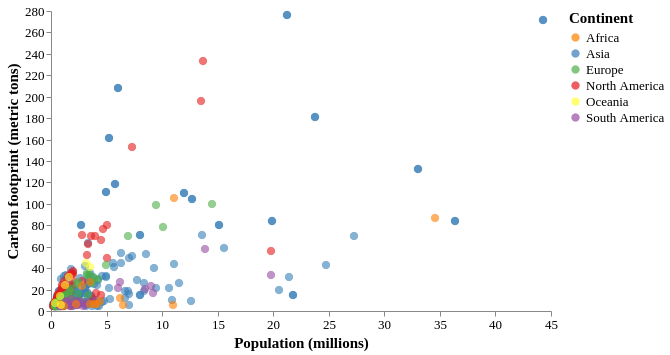

In [2]:
specV3=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Scatter plot with interactive legend and x-axis.",
  "padding": 5,
  "autosize": "pad",
  "signals": [
    {
      "name": "clear",
      "value": true,
      "on": [
        {
          "events": "mouseup[!event.item]",
          "update": "true",
          "force": true
        }
      ]
    },
    {
      "name": "shift",
      "value": false,
      "on": [
        {
          "events": "@legendSymbol:click, @legendLabel:click",
          "update": "event.shiftKey",
          "force": true
        }
      ]
    },
    {
      "name": "clicked",
      "value": null,
      "on": [
        {
          "events": "@legendSymbol:click, @legendLabel:click",
          "update": "{value: datum.value}",
          "force": true
        }
      ]
    },
    {
      "name": "brush",
      "value": 0,
      "on": [
        {
          "events": {
            "signal": "clear"
          },
          "update": "clear ? [0, 0] : brush"
        },
        {
          "events": "@xaxis:mousedown",
          "update": "[x(), x()]"
        },
        {
          "events": "[@xaxis:mousedown, window:mouseup] > window:mousemove!",
          "update": "[brush[0], clamp(x(), 0, width)]"
        },
        {
          "events": {
            "signal": "delta"
          },
          "update": "clampRange([anchor[0] + delta, anchor[1] + delta], 0, width)"
        }
      ]
    },
    {
      "name": "anchor",
      "value": null,
      "on": [
        {
          "events": "@brush:mousedown",
          "update": "slice(brush)"
        }
      ]
    },
    {
      "name": "xdown",
      "value": 0,
      "on": [
        {
          "events": "@brush:mousedown",
          "update": "x()"
        }
      ]
    },
    {
      "name": "delta",
      "value": 0,
      "on": [
        {
          "events": "[@brush:mousedown, window:mouseup] > window:mousemove!",
          "update": "x() - xdown"
        }
      ]
    },
    {
      "name": "domain",
      "on": [
        {
          "events": {
            "signal": "brush"
          },
          "update": "span(brush) ? invert('x', brush) : null"
        }
      ]
    }
  ],
  "data": [
    {
      "format": {
        "property": "data",
        "type": "json"
      },
      "url": "https://api.resourcewatch.org/v1/query/fd4b29a4-c4ce-4540-9c9f-b02e3dfc64be?sql=SELECT%20cartodb_id%2C%20urban_cluster%20as%20city%2C%20country%20as%20country%2C%20population_millions%20as%20x%2C%20footprint_mt_co2%20as%20y%2C%20continent%20FROM%20cli_009_a_city_carbon_footprints_with_continents%20ORDER%20BY%20CASE%20WHEN%20continent%3D'Asia'%20THEN%201%20WHEN%20continent%3D'Africa'%20THEN%205%20WHEN%20continent%3D'North%20America'%20THEN%202%20WHEN%20continent%3D'South%20America'%20THEN%204%20WHEN%20continent%3D'Oceania'%20THEN%206%20WHEN%20continent%3D'Europe'%20THEN%203%20END",
      "name": "source"
    },
    {
      "name": "selected",
      "on": [
        {
          "trigger": "clear",
          "remove": true
        },
        {
          "trigger": "!shift",
          "remove": true
        },
        {
          "trigger": "!shift && clicked",
          "insert": "clicked"
        },
        {
          "trigger": "shift && clicked",
          "toggle": "clicked"
        }
      ]
    }
  ],
  "scales": [
    {
      "range": "width",
      "domain": {
        "field": "x",
        "data": "source"
      },
      "zero": false,
      "nice": true,
      "round": true,
      "type": "linear",
      "name": "x"
    },
    {
      "range": "height",
      "domain": {
        "field": "y",
        "data": "source"
      },
      "zero": true,
      "nice": true,
      "round": true,
      "type": "linear",
      "name": "y"
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": [
        "#ff7f00",
        "#377eb8",
        "#4daf4a",
        "#e41a1c",
        "#ffff33",
        "#984ea3"
      ],
      "domain": [
        "Africa",
        "Asia",
        "Europe",
        "North America",
        "Oceania",
        "South America"
      ]
    }
  ],
  "axes": [
    {
      "title": "Population (millions)",
      "encode": {
        "title": {
          "update": {
            "font": {
              "value": "Lato"
            },
            "fontSize": {
              "value": 15
            }
          }
        },
        "labels": {
          "update": {
            "font": {
              "value": "Lato"
            },
            "fontSize": {
              "value": 13
            },
            "baseline": {
              "value": "top"
            },
            "align": {
              "value": "center"
            }
          }
        }
      },
      "orient": "bottom",
      "labelOverlap": "parity",
      "scale": "x"
    },
    {
      "title": "Carbon footprint (metric tons)",
      "encode": {
        "title": {
          "update": {
            "fontSize": {
              "value": 15
            },
            "font": {
              "value": "Lato"
            }
          }
        },
        "labels": {
          "update": {
            "font": {
              "value": "Lato"
            },
            "fontSize": {
              "value": 13
            }
          }
        }
      },
      "format": "s",
      "orient": "left",
      "labelOverlap": "parity",
      "scale": "y"
    }
  ],
  "legends": [
    {
      "fill": "color",
      "title": "Continent",
      "encode": {
        "title": {
          "update": {
            "font": {
              "value": "Lato"
            },
            "fontSize": {
              "value": 15
            }
          }
        },
        "symbols": {
          "name": "legendSymbol",
          "interactive": true,
          "update": {
            "strokeWidth": {
              "value": 2
            },
            "opacity": [
              {
                "test": "!length(data('selected')) || indata('selected', 'value', datum.value)",
                "value": 0.7
              },
              {
                "value": 0.15
              }
            ],
            "size": {
              "value": 70
            }
          }
        },
        "labels": {
          "name": "legendLabel",
          "interactive": true,
          "update": {
            "font": {
              "value": "Lato"
            },
            "fontSize": {
              "value": 13
            },
            "opacity": [
              {
                "test": "!length(data('selected')) || indata('selected', 'value', datum.value)",
                "value": 1
              },
              {
                "value": 0.25
              }
            ]
          }
        }
      }
    }
  ],
  "interaction_config": [
    {
      "config": {
        "fields": [
          {
            "format": ".2s",
            "type": "number",
            "property": "Carbon footprint (metric tons)",
            "column": "y"
          },
          {
            "format": ".2f",
            "type": "number",
            "property": "Population (millions)",
            "column": "x"
          },
          {
            "type": "string",
            "property": "City",
            "column": "city"
          },
          {
            "type": "string",
            "property": "Country",
            "column": "country"
          },
          {
            "type": "string",
            "property": "Continent",
            "column": "continent"
          }
        ]
      },
      "name": "tooltip"
    }
  ],
  "marks": [
    {
      "name": "marks",
      "type": "symbol",
      "from": {
        "data": "source"
      },
      "interactive": true,
      "encode": {
        "hover": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "shape": {
            "value": "circle"
          },
          "strokeWidth": {
            "value": 2
          },
          "size": {
            "value": 70
          },
          "opacity": [
            {
              "test": "(!domain || inrange(datum.x, domain)) && (!length(data('selected')) || indata('selected', 'value', datum.continent))",
              "value": 1
            },
            {
              "value": 0.15
            }
          ],
          "fill": [
            {
              "test": "(!domain || inrange(datum.x, domain)) && (!length(data('selected')) || indata('selected', 'value', datum.continent))",
              "scale": "color",
              "field": "continent"
            },
            {
              "value": "#ccc"
            }
          ]
        },
        "update": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "shape": {
            "value": "circle"
          },
          "strokeWidth": {
            "value": 2
          },
          "size": {
            "value": 70
          },
          "opacity": [
            {
              "test": "(!domain || inrange(datum.x, domain)) && (!length(data('selected')) || indata('selected', 'value', datum.continent))",
              "value": 0.6
            },
            {
              "value": 0
            }
          ],
          "fill": [
            {
              "test": "(!domain || inrange(datum.x, domain)) && (!length(data('selected')) || indata('selected', 'value', datum.continent))",
              "scale": "color",
              "field": "continent"
            },
            {
              "value": "#ccc"
            }
          ]
        }
      }
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['width']=500
vega4view['height']=300
Vega(vega4view)